In [ ]:
!pip install empath
import pickle
import numpy as np
import nltk 
import string 
import re 
import inflect 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from empath import Empath
from nltk.stem.porter import PorterStemmer 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble.bagging import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble.forest import ExtraTreesClassifier
import time
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 
lexicon = Empath()
p = inflect.engine() 

     |████████████████████████████████| 61kB 5.2MB/s 
  Created wheel for empath: filename=empath-0.89-cp36-none-any.whl size=57823 sha256=e8be340ffaaf79ba537194235f9526014cbd2ebd543063b674bfd26874191b86
  Stored in directory: /root/.cache/pip/wheels/84/ea/2f/2bc54d4f9985ce61753ebc5b00cb2df51d855589267c667308
Successfully built empath


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"virenkathiriya","key":"e40971a8871ea734bcd6672d5a46ca7d"}'}

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset

 93% 38.0M/41.0M [00:01<00:00, 24.3MB/s]
100% 41.0M/41.0M [00:01<00:00, 38.5MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile('./fake-and-real-news-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

In [ ]:
fake=pd.read_csv('Fake.csv')
category=['FALSE']*(23481)
fake['Category']=category
fake.head()

,title,text,subject,date,Category
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",FALSE
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",FALSE
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",FALSE
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",FALSE
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",FALSE


In [ ]:
true=pd.read_csv('True.csv')
category=['TRUE']*(21417)
true['Category']=category
true.head()

,title,text,subject,date,Category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",TRUE
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",TRUE
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",TRUE
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",TRUE
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",TRUE


In [ ]:
tot=true.head(5000).append(fake.head(5000),ignore_index=True)

df=tot
df.head()

,title,text,subject,date,Category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",TRUE
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",TRUE
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",TRUE
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",TRUE
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",TRUE


In [ ]:
df = df.sample(frac = 1)

In [ ]:
df.reset_index().index

RangeIndex(start=0, stop=10000, step=1)

In [ ]:
df['index']=df.reset_index().index

In [ ]:
df

,title,text,subject,date,Category,index
9475,Here You Go: Every Bat Sh*t Crazy Thing That ...,Donald Trump spent Monday night making a total...,News,"September 27, 2016",FALSE,0
5191,"Trump Wets His Pants Over Bob Corker Again, C...",Every time Donald Trump lashes out at Tennesse...,News,"October 24, 2017",FALSE,1
5991,Trump Throws Hissy Fit After New York Times R...,Donald Trump woke up on Wednesday morning and ...,News,"June 28, 2017",FALSE,2
893,Truck attack suspect's New Jersey city a haven...,"PATERSON, N.J. (Reuters) - With its enormous M...",politicsNews,"November 2, 2017",TRUE,3
2714,Two Republican senators join opposition to rev...,WASHINGTON (Reuters) - Republican Senators Jer...,politicsNews,"July 18, 2017",TRUE,4
...,...,...,...,...,...,...
6295,Ivanka Trump Gets RAILED For Daring To Claim ...,If Ivanka Trump really cares about the LGBTQ c...,News,"June 2, 2017",FALSE,9995
7039,Trump’s TIME Interview Is The Most Batsh*t F*...,Donald Trump at this point is known for spewin...,News,"March 23, 2017",FALSE,9996
9319,Fox Host Gives Trump The Most PATHETICALLY De...,Donald Trump s first debate against his Democr...,News,"October 7, 2016",FALSE,9997
751,Minnesota Senate may halt operations on Dec. 1...,(Reuters) - The Minnesota Senate will furlough...,politicsNews,"November 8, 2017",TRUE,9998


In [ ]:
training=df[:7000]
training

,title,text,subject,date,Category
3880,White House postpones meeting to decide on par...,WASHINGTON (Reuters) - A meeting of Trump admi...,politicsNews,"May 9, 2017",TRUE
3452,Trump's Paris decision followed debate between...,WASHINGTON (Reuters) - President Donald Trump’...,politicsNews,"June 1, 2017",TRUE
873,"Powell rose to top of Trump's list as safe, sa...",WASHINGTON/NEW YORK (Reuters) - Jerome Powell ...,politicsNews,"November 2, 2017",TRUE
3593,Former Trump campaign adviser Page to testify ...,"WASHINGTON (Reuters) - Carter Page, a former f...",politicsNews,"May 24, 2017",TRUE
49,Spy chiefs pressure Congress to renew expiring...,WASHINGTON (Reuters) - The leaders of the U.S....,politicsNews,"December 21, 2017",TRUE
...,...,...,...,...,...
9412,Mitch McConnell Freezes GOP Donors Into Loude...,It s become a weekly ritual: Trump goes throug...,News,"October 1, 2016",FALSE
4904,Treasury's Mnuchin says Trump does not want tr...,BERLIN (Reuters) - U.S. Treasury Secretary Ste...,politicsNews,"March 16, 2017",TRUE
9395,BREAKING: Harry Reid Calls Trump ‘Rich Brat’ ...,Donald Trump has one hell of a week. Starting ...,News,"October 2, 2016",FALSE
3436,BHP disappointed by Trump withdrawal from Pari...,"LONDON (Reuters) - BHP, the world’s largest mi...",politicsNews,"June 2, 2017",TRUE


In [ ]:
testing = df[7000:]
testing

,title,text,subject,date,Category
8263,"Noam Chomsky Makes ONE Last Request Of Obama,...",As many of us are slowly (and sadly) coming to...,News,"December 27, 2016",FALSE
7676,Dianne Feinstein: Trump Is ‘Splitting’ The Un...,Senator Dianne Feinstein went on Fox News this...,News,"February 5, 2017",FALSE
4939,"Government leakers are 'enemies to our state,'...",WASHINGTON (Reuters) - Individuals who steal c...,politicsNews,"March 15, 2017",TRUE
3858,"Trump fires FBI Director Comey, setting off U....",WASHINGTON (Reuters) - U.S. President Donald ...,politicsNews,"May 9, 2017",TRUE
5689,‘Auntie’ Maxine Waters’ Showdown In Senate In...,I ll admit it: I am not a huge fan of tribute ...,News,"August 2, 2017",FALSE
...,...,...,...,...,...
9562,WATCH: Fox News Gets OWNED By Police Chief Fo...,The hosts of Fox & Friends were hoping a Minne...,News,"September 19, 2016",FALSE
1020,Judge rejects bid by 18 states to revive Obama...,SAN FRANCISCO/WASHINGTON (Reuters) - A U.S. ju...,politicsNews,"October 25, 2017",TRUE
8104,WATCH: Hypocrite Mitch McConnell Tells Democr...,"You know, because Republicans are now pretendi...",News,"January 8, 2017",FALSE
4422,Mexico urges respect from U.S. for 2018 presid...,(Reuters) - U.S. officials should be respectfu...,politicsNews,"April 6, 2017",TRUE


In [ ]:
training_emp = training.slice()
testing_emp = testing.slice()

In [ ]:
def empath_feature_calc(text):
    try:
        return lexicon.analyze(text,normalize=True)
    except:
        return None

# df['empath_features'] = df['text'].apply(empath_feature_calc)

In [ ]:
# def empath_feature_calc(text):
#     try:
#         return lexicon.analyze(text,normalize=True)
#     except:
#         return None

training_emp['empath_features'] = training_emp['text'].apply(empath_feature_calc)
testing_emp['empath_features'] = testing_emp['text'].apply(empath_feature_calc)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
text_analysis=df['empath_features'].iloc[1]
print(text_analysis)
print(df.Category.shape)
print(df.shape)
print(df.empath_features)

{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'money': 0.0029239766081871343, 'wedding': 0.0, 'domestic_work': 0.0, 'sleep': 0.0, 'medical_emergency': 0.0, 'cold': 0.0, 'hate': 0.005847953216374269, 'cheerfulness': 0.0, 'aggression': 0.011695906432748537, 'occupation': 0.0029239766081871343, 'envy': 0.0029239766081871343, 'anticipation': 0.0, 'family': 0.0, 'vacation': 0.0, 'crime': 0.0, 'attractive': 0.0, 'masculine': 0.0, 'prison': 0.0, 'health': 0.0, 'pride': 0.0, 'dispute': 0.008771929824561403, 'nervousness': 0.0, 'government': 0.0029239766081871343, 'weakness': 0.0, 'horror': 0.0, 'swearing_terms': 0.008771929824561403, 'leisure': 0.0, 'suffering': 0.0029239766081871343, 'royalty': 0.0, 'wealthy': 0.0, 'tourism': 0.0, 'furniture': 0.0, 'school': 0.0, 'magic': 0.0, 'beach': 0.0, 'journalism': 0.0, 'morning': 0.0, 'banking': 0.0029239766081871343, 'social_media': 0.0, 'exercise': 0.0, 'night': 0.0, 'kill': 0.005847953216374269, 'blue_collar_job': 0.0, 'art': 0.0, 'ridicule': 0.0058479

In [ ]:
text_analysis_tr=training_emp['empath_features'].iloc[1]
text_analysis_test=testing_emp['empath_features'].iloc[1]
print(text_analysis_tr)
print(training_emp.Category.shape)
print(training_emp.shape)
print(training_emp.empath_features)

{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'money': 0.0029239766081871343, 'wedding': 0.0, 'domestic_work': 0.0, 'sleep': 0.0, 'medical_emergency': 0.0, 'cold': 0.0, 'hate': 0.005847953216374269, 'cheerfulness': 0.0, 'aggression': 0.011695906432748537, 'occupation': 0.0029239766081871343, 'envy': 0.0029239766081871343, 'anticipation': 0.0, 'family': 0.0, 'vacation': 0.0, 'crime': 0.0, 'attractive': 0.0, 'masculine': 0.0, 'prison': 0.0, 'health': 0.0, 'pride': 0.0, 'dispute': 0.008771929824561403, 'nervousness': 0.0, 'government': 0.0029239766081871343, 'weakness': 0.0, 'horror': 0.0, 'swearing_terms': 0.008771929824561403, 'leisure': 0.0, 'suffering': 0.0029239766081871343, 'royalty': 0.0, 'wealthy': 0.0, 'tourism': 0.0, 'furniture': 0.0, 'school': 0.0, 'magic': 0.0, 'beach': 0.0, 'journalism': 0.0, 'morning': 0.0, 'banking': 0.0029239766081871343, 'social_media': 0.0, 'exercise': 0.0, 'night': 0.0, 'kill': 0.005847953216374269, 'blue_collar_job': 0.0, 'art': 0.0, 'ridicule': 0.0058479

In [ ]:
newDF = pd.DataFrame(columns = list(df.empath_features[0].keys()))
# print(newDF.head())
exclude_idx = []
for i in range(df.shape[0]):
    dict_new_dataframe = df.empath_features[i]
    try:
        new_df = pd.DataFrame.from_dict(dict_new_dataframe.items()).transpose()
        header_new_dataframe = new_df.iloc[0]  # 0th index is header
        new_df = new_df[1:]  # fetch data except header
        new_df.columns = header_new_dataframe #set header as dataframe header in pandas
        newDF = newDF.append(new_df, ignore_index=True) # populate new dataframe with new data
    except:
        exclude_idx.append(i)
        pass

# print(df.shape)
# print(df.Category.shape)
# print(newDF.shape) # 194 categories converted into attributes for each row present in original dataset..

In [ ]:
newDF_tr = pd.DataFrame(columns = list(training_emp.empath_features[0].keys()))
# print(newDF.head())
exclude_idx = []
for i in range(training_emp.shape[0]):
    dict_new_dataframe = training_emp.empath_features[i]
    try:
        new_df = pd.DataFrame.from_dict(dict_new_dataframe.items()).transpose()
        header_new_dataframe = new_df.iloc[0]  # 0th index is header
        new_df = new_df[1:]  # fetch data except header
        new_df.columns = header_new_dataframe #set header as dataframe header in pandas
        newDF_tr = newDF_tr.append(new_df, ignore_index=True) # populate new dataframe with new data
    except:
        exclude_idx.append(i)
        pass

# newDF_test = pd.DataFrame(columns = list(testing_emp.empath_features[0].keys()))
# # print(newDF.head())
# exclude_idx1 = []
# for i in range(testing_emp.shape[0]):
#     dict_new_dataframe = testing_emp.empath_features[i]
#     try:
#         new_df = pd.DataFrame.from_dict(dict_new_dataframe.items()).transpose()
#         header_new_dataframe = new_df.iloc[0]  # 0th index is header
#         new_df = new_df[1:]  # fetch data except header
#         new_df.columns = header_new_dataframe #set header as dataframe header in pandas
#         newDF_test = newDF_test.append(new_df, ignore_index=True) # populate new dataframe with new data
#     except:
#         exclude_idx1.append(i)
#         pass

# print(df.shape)
# print(df.Category.shape)
# print(newDF.shape) # 194 categories converted into attributes for each row present in original dataset..

NameError: ignored

In [ ]:
newDF

,help,office,dance,money,wedding,domestic_work,sleep,medical_emergency,cold,hate,cheerfulness,aggression,occupation,envy,anticipation,family,vacation,crime,attractive,masculine,prison,health,pride,dispute,nervousness,government,weakness,horror,swearing_terms,leisure,suffering,royalty,wealthy,tourism,furniture,school,magic,beach,journalism,morning,...,car,strength,technology,breaking,shape_and_size,power,white_collar_job,animal,party,terrorism,smell,disappointment,poor,plant,pain,beauty,timidity,philosophy,negotiate,negative_emotion,cleaning,messaging,competing,law,friends,payment,achievement,alcohol,liquid,feminine,weapon,children,monster,ocean,giving,contentment,writing,rural,positive_emotion,musical
0,0.00801068,0.00400534,0.00133511,0.0320427,0.00267023,0.00133511,0,0.00400534,0,0,0,0.00267023,0.00267023,0,0,0.00133511,0.00534045,0.00133511,0,0,0,0.00267023,0,0.012016,0,0.0320427,0,0,0,0.00267023,0,0,0.0146862,0,0.00133511,0.00400534,0,0,0.00267023,0.00133511,...,0.00267023,0.00667557,0.00133511,0.00133511,0.00400534,0.00534045,0.00267023,0,0.00267023,0,0,0,0.0160214,0,0,0,0,0.00133511,0.00133511,0.00400534,0,0.00133511,0.00400534,0.0253672,0,0.024032,0.00133511,0,0,0,0,0.00133511,0,0,0.0160214,0,0,0,0.00133511,0.00133511
1,0.00480769,0.0160256,0,0,0.00641026,0,0,0.00801282,0,0,0,0.00160256,0.00641026,0,0,0,0.00160256,0.00160256,0.00641026,0.00801282,0,0.00801282,0,0.0112179,0,0.025641,0,0,0,0,0,0,0.00320513,0,0,0.0176282,0,0,0.0128205,0,...,0,0.00320513,0,0,0,0.00480769,0.00320513,0,0.00480769,0,0,0,0,0,0,0,0,0,0,0,0,0.00160256,0.00160256,0.0208333,0,0,0.00160256,0,0,0,0.00160256,0,0,0,0.00641026,0,0,0,0,0
2,0.00437637,0.0109409,0,0,0,0,0,0.00218818,0,0,0,0,0.00656455,0,0,0,0,0.0109409,0,0.00218818,0,0.00218818,0,0.00218818,0,0.02407,0.00218818,0,0,0,0.00218818,0.00218818,0,0,0.00218818,0.00656455,0,0,0.0153173,0.00437637,...,0,0,0,0.00437637,0,0,0.00437637,0,0.00218818,0,0,0,0,0,0.00218818,0,0,0,0,0.00218818,0,0,0.00218818,0.00656455,0,0,0,0,0,0,0.00218818,0,0,0,0.00218818,0,0,0,0,0
3,0.00265957,0.0132979,0,0,0,0,0,0,0,0,0,0,0.00531915,0,0,0,0,0.00531915,0,0,0.00531915,0,0,0.00531915,0,0.0212766,0,0,0,0.00265957,0,0.00265957,0,0.00265957,0.00531915,0,0,0,0.0106383,0,...,0.00265957,0,0,0,0.00265957,0.00265957,0.00531915,0,0.00265957,0.00265957,0,0,0,0.00265957,0,0,0,0,0,0.00265957,0.00265957,0.00265957,0.00265957,0.0132979,0.00265957,0,0,0,0,0,0.00265957,0,0,0,0,0,0,0,0.00265957,0
4,0.00117371,0.00586854,0,0.0117371,0,0,0,0.00234742,0,0,0,0.00117371,0.0105634,0,0,0,0.00234742,0.00234742,0,0,0.00234742,0.00117371,0,0.00234742,0,0.00704225,0.00117371,0,0,0.00352113,0,0,0.00469484,0.00234742,0.00469484,0.00352113,0,0.00117371,0.00352113,0.00117371,...,0,0.00234742,0.00352113,0.00234742,0.00704225,0.00117371,0.00704225,0.00117371,0.00352113,0,0.00117371,0.00117371,0,0,0,0,0.00234742,0,0.00234742,0.00586854,0.00117371,0.00704225,0.00234742,0.00469484,0,0.00938967,0,0,0,0,0.00117371,0.00117371,0,0.00117371,0.00469484,0,0.00234742,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.00179856,0.0143885,0,0.00179856,0.00179856,0,0,0,0.00359712,0,0.00179856,0.00179856,0.00179856,0,0.00359712,0,0.00179856,0.0125899,0,0,0.00359712,0,0,0.00899281,0.00179856,0.00719424,0,0,0.00179856,0,0,0,0,0,0,0.00179856,0,0,0.00359712,0,...,0,0,0,0.00179856,0,0.00359712,0.00179856,0,0.00179856,0.00359712,0,0,0,0,0.00359712,0,0,0.00179856,0,0.00539568,0,0.00359712,0.00179856,0.00899281,0,0.00179856,0.00179856,0,0,0,0.00179856,0,0.00179856,0,0,0.00179856,0.00359712,0,0.00179856,0
9996,0.00485437,0.00485437,0,0.00485437,0,0.00242718,0,0.00242718,0,0,0.00242718,0,0.00242718,0.00242718,0,0,0.00242718,0.0169903,0.00242718,0,0.0121359,0.00242718,0.00485437,0.00728155,0,0.012

In [ ]:
print(df.Category.shape)
category_in_original_dataframe=df.Category
print(len(category_in_original_dataframe))
for idx in exclude_idx:
  if(idx in category_in_original_dataframe):
    category_in_original_dataframe.pop(idx)
print(category_in_original_dataframe)  # 10 indexes removed..
newDF['Category']=category_in_original_dataframe
print(newDF.shape)

(10000,)
10000
6177    FALSE
8591    FALSE
9827    FALSE
5966    FALSE
5777    FALSE
        ...  
3727     TRUE
3542     TRUE
6740    FALSE
4222     TRUE
2612     TRUE
Name: Category, Length: 10000, dtype: object
(10000, 195)


In [ ]:
latestDF = newDF.dropna()  ## Remove rows with value NAN
print(latestDF.shape)

latest = list(latestDF.Category)
trueCategory = ['HALF TRUE','TRUE','PARTLY TRUE','Half True','Partly true','Partially true','Mostly True','MOSTLY TRUE']
falseCategory = ['misleading',  'Mostly false',   'FALSE', 'Explanatory', 'Correct', 'MOSTLY FALSE', 'Unlikely',
                'No evidence', 'PARTLY FALSE', 'Mainly false', 'No Evidence', 'Misleading',
               'false and misleading', 'Conspiracy theory', 'Mostly False', 'Partly false', 'Fake',
               'Misleading/False',  'Pants on Fire!', 'MISLEADING', 'Partially false', 'Not true',
               "(Org. doesn't apply rating)"]

allot=[]
for val in latest:
  if val in trueCategory:
    allot.append('TRUE')
  else:
    allot.append('FALSE')

print(allot)
print(len(allot))

(10000, 195)
['TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'T

In [ ]:
latestDF['latestCategory']=allot
latestDF.

,help,office,dance,money,wedding,domestic_work,sleep,medical_emergency,cold,hate,cheerfulness,aggression,occupation,envy,anticipation,family,vacation,crime,attractive,masculine,prison,health,pride,dispute,nervousness,government,weakness,horror,swearing_terms,leisure,suffering,royalty,wealthy,tourism,furniture,school,magic,beach,journalism,morning,...,technology,breaking,shape_and_size,power,white_collar_job,animal,party,terrorism,smell,disappointment,poor,plant,pain,beauty,timidity,philosophy,negotiate,negative_emotion,cleaning,messaging,competing,law,friends,payment,achievement,alcohol,liquid,feminine,weapon,children,monster,ocean,giving,contentment,writing,rural,positive_emotion,musical,Category,latestCategory
0,0.00801068,0.00400534,0.00133511,0.0320427,0.00267023,0.00133511,0,0.00400534,0,0,0,0.00267023,0.00267023,0,0,0.00133511,0.00534045,0.00133511,0,0,0,0.00267023,0,0.012016,0,0.0320427,0,0,0,0.00267023,0,0,0.0146862,0,0.00133511,0.00400534,0,0,0.00267023,0.00133511,...,0.00133511,0.00133511,0.00400534,0.00534045,0.00267023,0,0.00267023,0,0,0,0.0160214,0,0,0,0,0.00133511,0.00133511,0.00400534,0,0.00133511,0.00400534,0.0253672,0,0.024032,0.00133511,0,0,0,0,0.00133511,0,0,0.0160214,0,0,0,0.00133511,0.00133511,TRUE,TRUE
1,0.00480769,0.0160256,0,0,0.00641026,0,0,0.00801282,0,0,0,0.00160256,0.00641026,0,0,0,0.00160256,0.00160256,0.00641026,0.00801282,0,0.00801282,0,0.0112179,0,0.025641,0,0,0,0,0,0,0.00320513,0,0,0.0176282,0,0,0.0128205,0,...,0,0,0,0.00480769,0.00320513,0,0.00480769,0,0,0,0,0,0,0,0,0,0,0,0,0.00160256,0.00160256,0.0208333,0,0,0.00160256,0,0,0,0.00160256,0,0,0,0.00641026,0,0,0,0,0,TRUE,TRUE
2,0.00437637,0.0109409,0,0,0,0,0,0.00218818,0,0,0,0,0.00656455,0,0,0,0,0.0109409,0,0.00218818,0,0.00218818,0,0.00218818,0,0.02407,0.00218818,0,0,0,0.00218818,0.00218818,0,0,0.00218818,0.00656455,0,0,0.0153173,0.00437637,...,0,0.00437637,0,0,0.00437637,0,0.00218818,0,0,0,0,0,0.00218818,0,0,0,0,0.00218818,0,0,0.00218818,0.00656455,0,0,0,0,0,0,0.00218818,0,0,0,0.00218818,0,0,0,0,0,TRUE,TRUE
3,0.00265957,0.0132979,0,0,0,0,0,0,0,0,0,0,0.00531915,0,0,0,0,0.00531915,0,0,0.00531915,0,0,0.00531915,0,0.0212766,0,0,0,0.00265957,0,0.00265957,0,0.00265957,0.00531915,0,0,0,0.0106383,0,...,0,0,0.00265957,0.00265957,0.00531915,0,0.00265957,0.00265957,0,0,0,0.00265957,0,0,0,0,0,0.00265957,0.00265957,0.00265957,0.00265957,0.0132979,0.00265957,0,0,0,0,0,0.00265957,0,0,0,0,0,0,0,0.00265957,0,TRUE,TRUE
4,0.00117371,0.00586854,0,0.0117371,0,0,0,0.00234742,0,0,0,0.00117371,0.0105634,0,0,0,0.00234742,0.00234742,0,0,0.00234742,0.00117371,0,0.00234742,0,0.00704225,0.00117371,0,0,0.00352113,0,0,0.00469484,0.00234742,0.00469484,0.00352113,0,0.00117371,0.00352113,0.00117371,...,0.00352113,0.00234742,0.00704225,0.00117371,0.00704225,0.00117371,0.00352113,0,0.00117371,0.00117371,0,0,0,0,0.00234742,0,0.00234742,0.00586854,0.00117371,0.00704225,0.00234742,0.00469484,0,0.00938967,0,0,0,0,0.00117371,0.00117371,0,0.00117371,0.00469484,0,0.00234742,0,0,0,TRUE,TRUE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.00179856,0.0143885,0,0.00179856,0.00179856,0,0,0,0.00359712,0,0.00179856,0.00179856,0.00179856,0,0.00359712,0,0.00179856,0.0125899,0,0,0.00359712,0,0,0.00899281,0.00179856,0.00719424,0,0,0.00179856,0,0,0,0,0,0,0.00179856,0,0,0.00359712,0,...,0,0.00179856,0,0.00359712,0.00179856,0,0.00179856,0.00359712,0,0,0,0,0.00359712,0,0,0.00179856,0,0.00539568,0,0.00359712,0.00179856,0.00899281,0,0.00179856,0.00179856,0,0,0,0.00179856,0,0.00179856,0,0,0.00179856,0.00359712,0,0.00179856,0,FALSE,FALSE
9996,0.00485437,0.00485437,0,0.00485437,0,0.00242718,0,0.00242718,0,0,0.00242718,0,0.00242718,0.00242718,0,0,0.00242718,0.0169903,0.00242718,0,0.0121359,0.00242718,0.00485437,0.00728155,0,0

In [ ]:
deceptive_news=latestDF[latestDF["latestCategory"]=='FALSE']
print(deceptive_news)

0           help      office dance  ...     musical Category latestCategory
5000           0           0     0  ...           0    FALSE          FALSE
5001  0.00983607  0.00983607     0  ...           0    FALSE          FALSE
5002           0  0.00172414     0  ...           0    FALSE          FALSE
5003  0.00225225  0.00225225     0  ...  0.00225225    FALSE          FALSE
5004           0           0     0  ...           0    FALSE          FALSE
...          ...         ...   ...  ...         ...      ...            ...
9995  0.00179856   0.0143885     0  ...           0    FALSE          FALSE
9996  0.00485437  0.00485437     0  ...           0    FALSE          FALSE
9997  0.00184843           0     0  ...  0.00184843    FALSE          FALSE
9998           0           0     0  ...   0.0021692    FALSE          FALSE
9999           0   0.0027027     0  ...           0    FALSE          FALSE

[5000 rows x 196 columns]


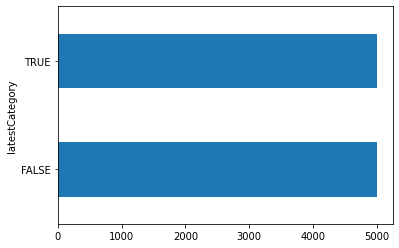

In [ ]:
latestDF.groupby(['latestCategory']).size().plot(kind='barh')

Text Summ

In [ ]:
!pip install empath
import pickle
import numpy as np
import nltk 
import string 
import re 
import inflect 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from empath import Empath
from nltk.stem.porter import PorterStemmer 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble.bagging import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble.forest import ExtraTreesClassifier
import time
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 
lexicon = Empath()
p = inflect.engine() 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import time
vectorizer = TfidfVectorizer(stop_words="english",
                        use_idf=True,
                        ngram_range=(1,1), # considering only 1-grams
                        min_df = 0.05,     # cut words present in less than 5% of documents
                        max_df = 0.3)      # cut words present in more than 30% of documents 
t0 = time.time()

tfidf = vectorizer.fit_transform(df['text'])

In [ ]:
from sklearn.decomposition import NMF
n_topics = 15
nmf = NMF(n_components=n_topics,random_state=0)
topics = nmf.fit_transform(tfidf)
top_n_words = 5
t_words, word_strengths = {}, {}
for t_id, t in enumerate(nmf.components_):
    t_words[t_id] = [vectorizer.get_feature_names()[i] for i in t.argsort()[:-top_n_words - 1:-1]]
    word_strengths[t_id] = t[t.argsort()[:-top_n_words - 1:-1]]
t_words

{0: ['women', 'know', 'right', 'don', 'going'],
 1: ['senate', 'republicans', 'vote', 'committee', 'senator'],
 2: ['russia', 'russian', 'intelligence', 'moscow', 'putin'],
 3: ['state', 'department', 'government', 'budget', 'federal'],
 4: ['tax', 'percent', 'reform', 'taxes', 'plan'],
 5: ['obamacare', 'insurance', 'healthcare', 'health', 'care'],
 6: ['realdonaldtrump', '2017', 'twitter', 'pic', 'com'],
 7: ['comey', 'fbi', 'investigation', 'director', 'james'],
 8: ['court', 'supreme', 'judge', 'case', 'justice'],
 9: ['ban', 'order', 'muslim', 'countries', 'united'],
 10: ['clinton', 'hillary', 'election', 'campaign', 'voters'],
 11: ['obama', 'barack', 'administration', 'years', 'rules'],
 12: ['trade', 'china', 'united', 'agreement', 'deal'],
 13: ['korea', 'north', 'nuclear', 'sanctions', 'china'],
 14: ['news', 'fox', 'media', 'fake', 'press']}

In [ ]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('tfidf', vectorizer),
    ('nmf', nmf)
])

In [ ]:
t = pipe.transform(df['text']) 
t = pd.DataFrame(t, columns=[str(t_words[i]) for i in range(0,15)])
t.head()

,"['women', 'know', 'right', 'don', 'going']","['senate', 'republicans', 'vote', 'committee', 'senator']","['russia', 'russian', 'intelligence', 'moscow', 'putin']","['state', 'department', 'government', 'budget', 'federal']","['tax', 'percent', 'reform', 'taxes', 'plan']","['obamacare', 'insurance', 'healthcare', 'health', 'care']","['realdonaldtrump', '2017', 'twitter', 'pic', 'com']","['comey', 'fbi', 'investigation', 'director', 'james']","['court', 'supreme', 'judge', 'case', 'justice']","['ban', 'order', 'muslim', 'countries', 'united']","['clinton', 'hillary', 'election', 'campaign', 'voters']","['obama', 'barack', 'administration', 'years', 'rules']","['trade', 'china', 'united', 'agreement', 'deal']","['korea', 'north', 'nuclear', 'sanctions', 'china']","['news', 'fox', 'media', 'fake', 'press']"
0,0.029438,0.007185,0.015271,0.000000,0.000000,0.000000,0.027462,0.034195,0.0,0.019910,0.010018,0.153033,0.016001,0.004258,0.000000
1,0.036545,0.000937,0.000000,0.000000,0.001213,0.000000,0.000000,0.000000,0.0,0.000000,0.002914,0.050289,0.068920,0.014670,0.006690
2,0.031254,0.000000,0.000000,0.005317,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.037210,0.000000,0.000000,0.001051,0.054444
3,0.046193,0.000000,0.000000,0.000000,0.000000,0.000000,0.019072,0.000000,0.0,0.006633,0.032761,0.007504,0.003853,0.000000,0.053620
4,0.040384,0.000000,0.086375,0.000000,0.000270,0.004916,0.000000,0.000000,0.0,0.000000,0.009587,0.000000,0.000000,0.000000,0.031001


In [ ]:
t

,"['women', 'know', 'right', 'don', 'going']","['senate', 'republicans', 'vote', 'committee', 'senator']","['russia', 'russian', 'intelligence', 'moscow', 'putin']","['state', 'department', 'government', 'budget', 'federal']","['tax', 'percent', 'reform', 'taxes', 'plan']","['obamacare', 'insurance', 'healthcare', 'health', 'care']","['realdonaldtrump', '2017', 'twitter', 'pic', 'com']","['comey', 'fbi', 'investigation', 'director', 'james']","['court', 'supreme', 'judge', 'case', 'justice']","['ban', 'order', 'muslim', 'countries', 'united']","['clinton', 'hillary', 'election', 'campaign', 'voters']","['obama', 'barack', 'administration', 'years', 'rules']","['trade', 'china', 'united', 'agreement', 'deal']","['korea', 'north', 'nuclear', 'sanctions', 'china']","['news', 'fox', 'media', 'fake', 'press']"
0,0.029438,0.007185,0.015271,0.000000,0.000000,0.000000,0.027462,0.034195,0.000000,0.019910,0.010018,0.153033,0.016001,0.004258,0.000000
1,0.036545,0.000937,0.000000,0.000000,0.001213,0.000000,0.000000,0.000000,0.000000,0.000000,0.002914,0.050289,0.068920,0.014670,0.006690
2,0.031254,0.000000,0.000000,0.005317,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037210,0.000000,0.000000,0.001051,0.054444
3,0.046193,0.000000,0.000000,0.000000,0.000000,0.000000,0.019072,0.000000,0.000000,0.006633,0.032761,0.007504,0.003853,0.000000,0.053620
4,0.040384,0.000000,0.086375,0.000000,0.000270,0.004916,0.000000,0.000000,0.000000,0.000000,0.009587,0.000000,0.000000,0.000000,0.031001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.022859,0.000000,0.052497,0.038922,0.000000,0.000000,0.003521,0.042201,0.000000,0.047351,0.001808,0.028812,0.020941,0.002347,0.020002
9996,0.000000,0.055669,0.124972,0.002108,0.000000,0.000000,0.002737,0.084090,0.004667,0.000000,0.015438,0.000000,0.000000,0.000000,0.000000
9997,0.042659,0.016302,0.000000,0.012856,0.002465,0.007260,0.000000,0.000000,0.000000,0.000000,0.004349,0.037035,0.000000,0.000000,0.000000
9998,0.000000,0.000307,0.000000,0.000000,0.003506,0.001586,0.000000,0.000000,0.000000,0.000000,0.002635,0.000000,0.000000,0.220174,0.000000


In [ ]:
merged=pd.concat([t, latestDF], axis=1)

In [ ]:
merged

,"['women', 'know', 'right', 'don', 'going']","['senate', 'republicans', 'vote', 'committee', 'senator']","['russia', 'russian', 'intelligence', 'moscow', 'putin']","['state', 'department', 'government', 'budget', 'federal']","['tax', 'percent', 'reform', 'taxes', 'plan']","['obamacare', 'insurance', 'healthcare', 'health', 'care']","['realdonaldtrump', '2017', 'twitter', 'pic', 'com']","['comey', 'fbi', 'investigation', 'director', 'james']","['court', 'supreme', 'judge', 'case', 'justice']","['ban', 'order', 'muslim', 'countries', 'united']","['clinton', 'hillary', 'election', 'campaign', 'voters']","['obama', 'barack', 'administration', 'years', 'rules']","['trade', 'china', 'united', 'agreement', 'deal']","['korea', 'north', 'nuclear', 'sanctions', 'china']","['news', 'fox', 'media', 'fake', 'press']",help,office,dance,money,wedding,domestic_work,sleep,medical_emergency,cold,hate,cheerfulness,aggression,occupation,envy,anticipation,family,vacation,crime,attractive,masculine,prison,health,pride,dispute,nervousness,...,technology,breaking,shape_and_size,power,white_collar_job,animal,party,terrorism,smell,disappointment,poor,plant,pain,beauty,timidity,philosophy,negotiate,negative_emotion,cleaning,messaging,competing,law,friends,payment,achievement,alcohol,liquid,feminine,weapon,children,monster,ocean,giving,contentment,writing,rural,positive_emotion,musical,Category,latestCategory
0,0.029438,0.007185,0.015271,0.000000,0.000000,0.000000,0.027462,0.034195,0.000000,0.019910,0.010018,0.153033,0.016001,0.004258,0.000000,0.00801068,0.00400534,0.00133511,0.0320427,0.00267023,0.00133511,0,0.00400534,0,0,0,0.00267023,0.00267023,0,0,0.00133511,0.00534045,0.00133511,0,0,0,0.00267023,0,0.012016,0,...,0.00133511,0.00133511,0.00400534,0.00534045,0.00267023,0,0.00267023,0,0,0,0.0160214,0,0,0,0,0.00133511,0.00133511,0.00400534,0,0.00133511,0.00400534,0.0253672,0,0.024032,0.00133511,0,0,0,0,0.00133511,0,0,0.0160214,0,0,0,0.00133511,0.00133511,TRUE,TRUE
1,0.036545,0.000937,0.000000,0.000000,0.001213,0.000000,0.000000,0.000000,0.000000,0.000000,0.002914,0.050289,0.068920,0.014670,0.006690,0.00480769,0.0160256,0,0,0.00641026,0,0,0.00801282,0,0,0,0.00160256,0.00641026,0,0,0,0.00160256,0.00160256,0.00641026,0.00801282,0,0.00801282,0,0.0112179,0,...,0,0,0,0.00480769,0.00320513,0,0.00480769,0,0,0,0,0,0,0,0,0,0,0,0,0.00160256,0.00160256,0.0208333,0,0,0.00160256,0,0,0,0.00160256,0,0,0,0.00641026,0,0,0,0,0,TRUE,TRUE
2,0.031254,0.000000,0.000000,0.005317,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037210,0.000000,0.000000,0.001051,0.054444,0.00437637,0.0109409,0,0,0,0,0,0.00218818,0,0,0,0,0.00656455,0,0,0,0,0.0109409,0,0.00218818,0,0.00218818,0,0.00218818,0,...,0,0.00437637,0,0,0.00437637,0,0.00218818,0,0,0,0,0,0.00218818,0,0,0,0,0.00218818,0,0,0.00218818,0.00656455,0,0,0,0,0,0,0.00218818,0,0,0,0.00218818,0,0,0,0,0,TRUE,TRUE
3,0.046193,0.000000,0.000000,0.000000,0.000000,0.000000,0.019072,0.000000,0.000000,0.006633,0.032761,0.007504,0.003853,0.000000,0.053620,0.00265957,0.0132979,0,0,0,0,0,0,0,0,0,0,0.00531915,0,0,0,0,0.00531915,0,0,0.00531915,0,0,0.00531915,0,...,0,0,0.00265957,0.00265957,0.00531915,0,0.00265957,0.00265957,0,0,0,0.00265957,0,0,0,0,0,0.00265957,0.00265957,0.00265957,0.00265957,0.0132979,0.00265957,0,0,0,0,0,0.00265957,0,0,0,0,0,0,0,0.00265957,0,TRUE,TRUE
4,0.040384,0.000000,0.086375,0.000000,0.000270,0.004916,0.000000,0.000000,0.000000,0.000000,0.009587,0.000000,0.000000,0.000000,0.031001,0.00117371,0.00586854,0,0.0117371,0,0,0,0.00234742,0,0,0,0.00117371,0.0105634,0,0,0,0.00234742,0.00234742,0,0,0.00234742,0.00117371,0,0.00234742,0,...,0.00352113,0.00234742,0.00704225,0.00117371,0.00704225,0.00117371,0.00352113,0,0.00117371,0.00117371,0,0,0,0,0.00234742,0,0.00234742,0.00586854,0.00117371,0.00704225,0.00234742,0.00469484,0,0.00938967,0,0,0,0,0.00117371,0.00117371,0,0.00117371,0.00469484,0,0.00234742,0,0,0,TRUE,TRUE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
import time
def test_models(models,X_train, X_test, y_train, y_test):
    start = time.time()
    score=[]
    acc=[]
    for model_name in models:
        model=model_name
        model.fit(X_train,y_train)
        y_test_hat=model.predict(X_test)
        ac=accuracy_score(y_test_hat,y_test)
        cm=confusion_matrix(y_test, y_test_hat)

        FP = cm.sum(axis=0) - np.diag(cm)  
        FN = cm.sum(axis=1) - np.diag(cm)
        TP = np.diag(cm)
        TN = cm.sum() - (FP + FN + TP)

        # Sensitivity, hit rate, recall, or true positive rate
        TPR = TP/(TP+FN)
        # Specificity or true negative rate
        TNR = TN/(TN+FP) 
        # Precision or positive predictive value
        PPV = TP/(TP+FP)
        # Negative predictive value
        NPV = TN/(TN+FN)
        # Fall out or false positive rate
        FPR = FP/(FP+TN)
        # False negative rate
        FNR = FN/(TP+FN)
        # False discovery rate
        FDR = FP/(TP+FP)

        # Overall accuracy
        ACC = (TP+TN)/(TP+FP+FN+TN)

        model_score=round(model.score(X_test, y_test), 2) 
        score.append(model_score)
        acc.append(ACC)

        print('%s Overall accuracy:' % model_name, ACC)
        end = time.time()
        print('Execution Time:', end-start)
    print("Corresponsing models used:-",models)
    print("F1Score is :",score)
    print("Accuracy is:",acc)

In [ ]:
# merged.drop('Category',axis='columns', inplace=True)
merged.drop('latestCategory',axis='columns', inplace=True)

In [ ]:
merged

,"['women', 'know', 'right', 'don', 'going']","['senate', 'republicans', 'vote', 'committee', 'senator']","['russia', 'russian', 'intelligence', 'moscow', 'putin']","['state', 'department', 'government', 'budget', 'federal']","['tax', 'percent', 'reform', 'taxes', 'plan']","['obamacare', 'insurance', 'healthcare', 'health', 'care']","['realdonaldtrump', '2017', 'twitter', 'pic', 'com']","['comey', 'fbi', 'investigation', 'director', 'james']","['court', 'supreme', 'judge', 'case', 'justice']","['ban', 'order', 'muslim', 'countries', 'united']","['clinton', 'hillary', 'election', 'campaign', 'voters']","['obama', 'barack', 'administration', 'years', 'rules']","['trade', 'china', 'united', 'agreement', 'deal']","['korea', 'north', 'nuclear', 'sanctions', 'china']","['news', 'fox', 'media', 'fake', 'press']",help,office,dance,money,wedding,domestic_work,sleep,medical_emergency,cold,hate,cheerfulness,aggression,occupation,envy,anticipation,family,vacation,crime,attractive,masculine,prison,health,pride,dispute,nervousness,...,strength,technology,breaking,shape_and_size,power,white_collar_job,animal,party,terrorism,smell,disappointment,poor,plant,pain,beauty,timidity,philosophy,negotiate,negative_emotion,cleaning,messaging,competing,law,friends,payment,achievement,alcohol,liquid,feminine,weapon,children,monster,ocean,giving,contentment,writing,rural,positive_emotion,musical,Category
0,0.029438,0.007185,0.015271,0.000000,0.000000,0.000000,0.027462,0.034195,0.000000,0.019910,0.010018,0.153033,0.016001,0.004258,0.000000,0.00801068,0.00400534,0.00133511,0.0320427,0.00267023,0.00133511,0,0.00400534,0,0,0,0.00267023,0.00267023,0,0,0.00133511,0.00534045,0.00133511,0,0,0,0.00267023,0,0.012016,0,...,0.00667557,0.00133511,0.00133511,0.00400534,0.00534045,0.00267023,0,0.00267023,0,0,0,0.0160214,0,0,0,0,0.00133511,0.00133511,0.00400534,0,0.00133511,0.00400534,0.0253672,0,0.024032,0.00133511,0,0,0,0,0.00133511,0,0,0.0160214,0,0,0,0.00133511,0.00133511,TRUE
1,0.036545,0.000937,0.000000,0.000000,0.001213,0.000000,0.000000,0.000000,0.000000,0.000000,0.002914,0.050289,0.068920,0.014670,0.006690,0.00480769,0.0160256,0,0,0.00641026,0,0,0.00801282,0,0,0,0.00160256,0.00641026,0,0,0,0.00160256,0.00160256,0.00641026,0.00801282,0,0.00801282,0,0.0112179,0,...,0.00320513,0,0,0,0.00480769,0.00320513,0,0.00480769,0,0,0,0,0,0,0,0,0,0,0,0,0.00160256,0.00160256,0.0208333,0,0,0.00160256,0,0,0,0.00160256,0,0,0,0.00641026,0,0,0,0,0,TRUE
2,0.031254,0.000000,0.000000,0.005317,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037210,0.000000,0.000000,0.001051,0.054444,0.00437637,0.0109409,0,0,0,0,0,0.00218818,0,0,0,0,0.00656455,0,0,0,0,0.0109409,0,0.00218818,0,0.00218818,0,0.00218818,0,...,0,0,0.00437637,0,0,0.00437637,0,0.00218818,0,0,0,0,0,0.00218818,0,0,0,0,0.00218818,0,0,0.00218818,0.00656455,0,0,0,0,0,0,0.00218818,0,0,0,0.00218818,0,0,0,0,0,TRUE
3,0.046193,0.000000,0.000000,0.000000,0.000000,0.000000,0.019072,0.000000,0.000000,0.006633,0.032761,0.007504,0.003853,0.000000,0.053620,0.00265957,0.0132979,0,0,0,0,0,0,0,0,0,0,0.00531915,0,0,0,0,0.00531915,0,0,0.00531915,0,0,0.00531915,0,...,0,0,0,0.00265957,0.00265957,0.00531915,0,0.00265957,0.00265957,0,0,0,0.00265957,0,0,0,0,0,0.00265957,0.00265957,0.00265957,0.00265957,0.0132979,0.00265957,0,0,0,0,0,0.00265957,0,0,0,0,0,0,0,0.00265957,0,TRUE
4,0.040384,0.000000,0.086375,0.000000,0.000270,0.004916,0.000000,0.000000,0.000000,0.000000,0.009587,0.000000,0.000000,0.000000,0.031001,0.00117371,0.00586854,0,0.0117371,0,0,0,0.00234742,0,0,0,0.00117371,0.0105634,0,0,0,0.00234742,0.00234742,0,0,0.00234742,0.00117371,0,0.00234742,0,...,0.00234742,0.00352113,0.00234742,0.00704225,0.00117371,0.00704225,0.00117371,0.00352113,0,0.00117371,0.00117371,0,0,0,0,0.00234742,0,0.00234742,0.00586854,0.00117371,0.00704225,0.00234742,0.00469484,0,0.00938967,0,0,0,0,0.00117371,0.00117371,0,0.00117371,0.00469484,0,0.00234742,0,0,0,TRUE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
merged['Category']=allot

In [ ]:
merged

,help,office,dance,money,wedding,domestic_work,sleep,medical_emergency,cold,hate,cheerfulness,aggression,occupation,envy,anticipation,family,vacation,crime,attractive,masculine,prison,health,pride,dispute,nervousness,government,weakness,horror,swearing_terms,leisure,suffering,royalty,wealthy,tourism,furniture,school,magic,beach,journalism,morning,...,timidity,philosophy,negotiate,negative_emotion,cleaning,messaging,competing,law,friends,payment,achievement,alcohol,liquid,feminine,weapon,children,monster,ocean,giving,contentment,writing,rural,positive_emotion,musical,"['women', 'know', 'right', 'don', 'going']","['senate', 'republicans', 'vote', 'committee', 'senator']","['russia', 'russian', 'intelligence', 'moscow', 'putin']","['state', 'department', 'government', 'budget', 'federal']","['tax', 'percent', 'reform', 'taxes', 'plan']","['obamacare', 'insurance', 'healthcare', 'health', 'care']","['realdonaldtrump', '2017', 'twitter', 'pic', 'com']","['comey', 'fbi', 'investigation', 'director', 'james']","['court', 'supreme', 'judge', 'case', 'justice']","['ban', 'order', 'muslim', 'countries', 'united']","['clinton', 'hillary', 'election', 'campaign', 'voters']","['obama', 'barack', 'administration', 'years', 'rules']","['trade', 'china', 'united', 'agreement', 'deal']","['korea', 'north', 'nuclear', 'sanctions', 'china']","['news', 'fox', 'media', 'fake', 'press']",Category
0,0.00801068,0.00400534,0.00133511,0.0320427,0.00267023,0.00133511,0,0.00400534,0,0,0,0.00267023,0.00267023,0,0,0.00133511,0.00534045,0.00133511,0,0,0,0.00267023,0,0.012016,0,0.0320427,0,0,0,0.00267023,0,0,0.0146862,0,0.00133511,0.00400534,0,0,0.00267023,0.00133511,...,0,0.00133511,0.00133511,0.00400534,0,0.00133511,0.00400534,0.0253672,0,0.024032,0.00133511,0,0,0,0,0.00133511,0,0,0.0160214,0,0,0,0.00133511,0.00133511,0.029438,0.007185,0.015271,0.000000,0.000000,0.000000,0.027462,0.034195,0.000000,0.019910,0.010018,0.153033,0.016001,0.004258,0.000000,TRUE
1,0.00480769,0.0160256,0,0,0.00641026,0,0,0.00801282,0,0,0,0.00160256,0.00641026,0,0,0,0.00160256,0.00160256,0.00641026,0.00801282,0,0.00801282,0,0.0112179,0,0.025641,0,0,0,0,0,0,0.00320513,0,0,0.0176282,0,0,0.0128205,0,...,0,0,0,0,0,0.00160256,0.00160256,0.0208333,0,0,0.00160256,0,0,0,0.00160256,0,0,0,0.00641026,0,0,0,0,0,0.036545,0.000937,0.000000,0.000000,0.001213,0.000000,0.000000,0.000000,0.000000,0.000000,0.002914,0.050289,0.068920,0.014670,0.006690,TRUE
2,0.00437637,0.0109409,0,0,0,0,0,0.00218818,0,0,0,0,0.00656455,0,0,0,0,0.0109409,0,0.00218818,0,0.00218818,0,0.00218818,0,0.02407,0.00218818,0,0,0,0.00218818,0.00218818,0,0,0.00218818,0.00656455,0,0,0.0153173,0.00437637,...,0,0,0,0.00218818,0,0,0.00218818,0.00656455,0,0,0,0,0,0,0.00218818,0,0,0,0.00218818,0,0,0,0,0,0.031254,0.000000,0.000000,0.005317,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037210,0.000000,0.000000,0.001051,0.054444,TRUE
3,0.00265957,0.0132979,0,0,0,0,0,0,0,0,0,0,0.00531915,0,0,0,0,0.00531915,0,0,0.00531915,0,0,0.00531915,0,0.0212766,0,0,0,0.00265957,0,0.00265957,0,0.00265957,0.00531915,0,0,0,0.0106383,0,...,0,0,0,0.00265957,0.00265957,0.00265957,0.00265957,0.0132979,0.00265957,0,0,0,0,0,0.00265957,0,0,0,0,0,0,0,0.00265957,0,0.046193,0.000000,0.000000,0.000000,0.000000,0.000000,0.019072,0.000000,0.000000,0.006633,0.032761,0.007504,0.003853,0.000000,0.053620,TRUE
4,0.00117371,0.00586854,0,0.0117371,0,0,0,0.00234742,0,0,0,0.00117371,0.0105634,0,0,0,0.00234742,0.00234742,0,0,0.00234742,0.00117371,0,0.00234742,0,0.00704225,0.00117371,0,0,0.00352113,0,0,0.00469484,0.00234742,0.00469484,0.00352113,0,0.00117371,0.00352113,0.00117371,...,0.00234742,0,0.00234742,0.00586854,0.00117371,0.00704225,0.00234742,0.00469484,0,0.00938967,0,0,0,0,0.00117371,0.00117371,0,0.00117371,0.00469484,0,0.00234742,0,0,0,0.040384,0.000000,0.086375,0.000000,0.000270,0.004916,0.000000,0.000000,0.000000,0.000000,0.009587,0.000000,0.000000,0.000000,0.031001,TRUE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
columns=merged.columns[:-1]

x=merged[columns]
y=merged['Category']

In [ ]:
lr = LogisticRegression()
dt=DecisionTreeClassifier()
extraTree=ExtraTreesClassifier()
naive=GaussianNB()
lda=LinearDiscriminantAnalysis()
clf = SVC(kernel='linear')
knn2 = KNeighborsClassifier(n_neighbors = 2)
knn3 = KNeighborsClassifier(n_neighbors = 3) 
knn4 = KNeighborsClassifier(n_neighbors = 4) 
gbc = GradientBoostingClassifier(random_state=0)
regressor = RandomForestClassifier(n_estimators = 100)
bagging=BaggingClassifier()

models=[]
models.append(lr)
models.append(dt)
models.append(naive)
models.append(lda)
models.append(clf)
models.append(knn2)
models.append(knn3)
models.append(knn4)
models.append(gbc)
models.append(regressor)
models.append(bagging)
models.append(extraTree)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=42)

test_models(models,X_train, X_test, y_train, y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) Overall accuracy: [0.75133333 0.75133333]
Execution Time: 0.5023248195648193
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') Overall accuracy: [0.81033333 0.81033333]
Execution Time: 2.007581949234009
GaussianNB(priors=None, var_smoothing=1e-09) Overall accuracy: [0.798 0.798]
Execution Time: 2

#NER


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import base64
import string
import re
from collections import Counter
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.33, random_state=42)
train

,title,text,subject,date,Category,index,empath_features
9550,How Trump Is Hiding From The Media Like A Tot...,Donald Trump has a reputation in the media for...,News,"September 20, 2016",FALSE,8371,"{'help': 0.005571030640668524, 'office': 0.002..."
1016,Top Republican senator testifies for Menendez ...,(Reuters) - Republican U.S. Senator Lindsay Gr...,politicsNews,"October 26, 2017",TRUE,5027,"{'help': 0.006211180124223602, 'office': 0.009..."
1695,Opponents sharpen knives over impending U.S. p...,WASHINGTON (Reuters) - Lobbyists and Republica...,politicsNews,"September 21, 2017",TRUE,9234,"{'help': 0.004975124378109453, 'office': 0.0, ..."
5478,The Nickname White House Aides Have For Ivank...,"It was almost inevitable, really. We were boun...",News,"August 28, 2017",FALSE,3944,"{'help': 0.0028089887640449437, 'office': 0.00..."
6796,Democrats Demand Jared Kushner Be Stripped Of...,"Donald Trump s son-in-law and senior advisor, ...",News,"April 13, 2017",FALSE,6862,"{'help': 0.0, 'office': 0.011764705882352941, ..."
...,...,...,...,...,...,...,...
24,Failed vote to oust president shakes up Peru's...,LIMA (Reuters) - Peru’s President Pedro Pablo ...,politicsNews,"December 23, 2017",TRUE,5734,"{'help': 0.00436046511627907, 'office': 0.0058..."
1341,Factbox: Trump on Twitter (Oct 9) - North Kore...,The following statements were posted to the ve...,politicsNews,"October 10, 2017",TRUE,5191,"{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo..."
8927,Watch Beyoncé Tell The Entire World Why She S...,Appearing at a concert for Hillary Clinton in ...,News,"November 5, 2016",FALSE,5390,"{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo..."
2054,Trump unshackled: President defends Charlottes...,PHOENIX (Reuters) - U.S. President Donald Trum...,politicsNews,"August 22, 2017",TRUE,860,"{'help': 0.001091703056768559, 'office': 0.005..."


['Top Republican senator testifies for Menendez at bribery trial', 'Opponents sharpen knives over impending U.S. payday loan rule', 'Trump, at NATO, vows unwavering fight against terrorism', 'Connecticut attorney general, others ask Equifax to stop collecting fees', 'Hedge fund manager shuts firm to explore run for Connecticut governor', 'Trump discusses concern over Qatar dispute with Gulf, Arab states in calls', 'Threatened U.S. pullout might help, not hobble, global climate pact', 'Mexico foreign minister heads to U.S. to meet with Dreamers', 'Senate backs legislation to slap new sanctions on Russia', "French envoy says Paris climate deal doesn't infringe on U.S. sovereignty", 'Trump Hotels talking to about 10 new franchisees for midscale brand', 'Trump tax plan expends recession-fighting U.S. business tax break', 'Senate Republicans have 50 votes to pass tax bill: Cornyn', 'Kathy Griffin loses CNN deal after photos with fake severed Trump head', 'FBI chief sees no evidence of White

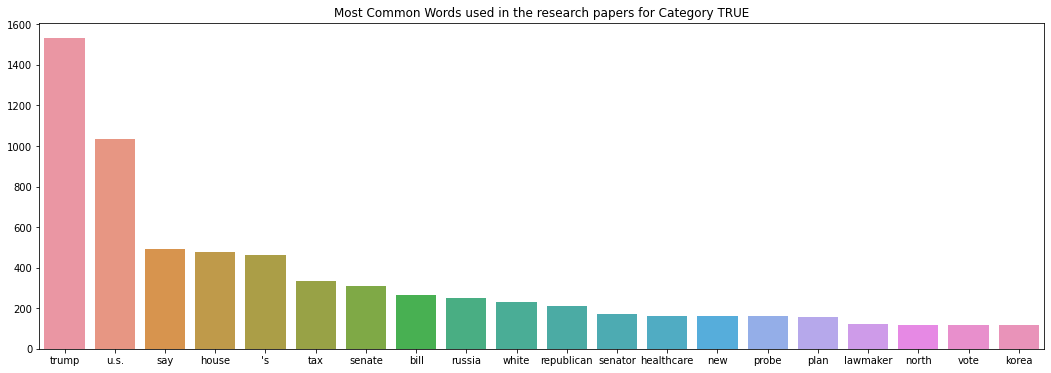

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
punctuations = string.punctuation
def cleanup_text(docs, logging=False):
    texts = []
    counter = 1
    for doc in docs:
        if counter % 1000 == 0 and logging:
            print("Processed %d out of %d documents." % (counter, len(docs)))
        counter += 1
        doc = nlp(doc, disable=['parser', 'ner'])
        tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
        tokens = [tok for tok in tokens if tok not in stopwords and tok not in punctuations]
        tokens = ' '.join(tokens)
        texts.append(tokens)
    return pd.Series(texts)
INFO_text = [text for text in train[train['Category'] == 'TRUE']['title']]
print(INFO_text)  ## Title for true data
IS_text = [text for text in train[train['Category'] == 'FALSE']['title']]  ## ## Title for false data
INFO_clean = cleanup_text(INFO_text)
INFO_clean = ' '.join(INFO_clean).split()
IS_clean = cleanup_text(IS_text)
IS_clean = ' '.join(IS_clean).split()
INFO_counts = Counter(INFO_clean)
IS_counts = Counter(IS_clean)
INFO_common_words = [word[0] for word in INFO_counts.most_common(20)]
INFO_common_counts = [word[1] for word in INFO_counts.most_common(20)]
fig = plt.figure(figsize=(18,6))
sns.barplot(x=INFO_common_words, y=INFO_common_counts)
plt.title('Most Common Words used in the research papers for Category TRUE')
plt.show()

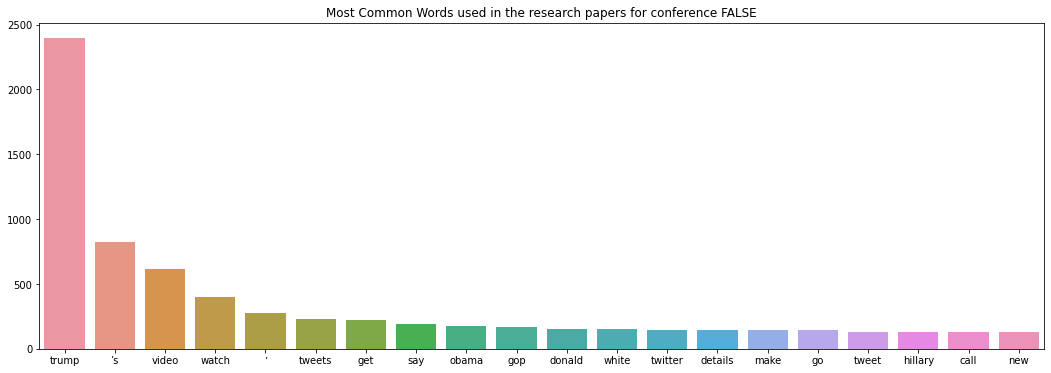

In [ ]:
IS_common_words = [word[0] for word in IS_counts.most_common(20)]
IS_common_counts = [word[1] for word in IS_counts.most_common(20)]
fig = plt.figure(figsize=(18,6))
sns.barplot(x=IS_common_words, y=IS_common_counts)
plt.title('Most Common Words used in the research papers for conference FALSE')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
import string
import re
import spacy
spacy.load('en')
from spacy.lang.en import English
parser = English()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
STOPLIST = set(stopwords.words('english') + list(ENGLISH_STOP_WORDS))
SYMBOLS = " ".join(string.punctuation).split(" ") + ["-", "...", "”", "”"]
class CleanTextTransformer(TransformerMixin):
   def transform(self, X, **transform_params):
        return [cleanText(text) for text in X]
   def fit(self, X, y=None, **fit_params):
        return self
def get_params(self, deep=True):
        return {}
    
def cleanText(text):
    text = text.strip().replace("\n", " ").replace("\r", " ")
    text = text.lower()
    return text
def tokenizeText(sample):
    tokens = parser(sample)
    lemmas = []
    for tok in tokens:
        lemmas.append(tok.lemma_.lower().strip() if tok.lemma_ != "-PRON-" else tok.lower_)
    tokens = lemmas
    tokens = [tok for tok in tokens if tok not in STOPLIST]
    tokens = [tok for tok in tokens if tok not in SYMBOLS]
    return tokens

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier 
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
def printNMostInformative(vectorizer, clf, N):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    topClass1 = coefs_with_fns[:N]
    topClass2 = coefs_with_fns[:-(N + 1):-1]
    print("Class 1 best: ")
    for feat in topClass1:
        print(feat)
    print("Class 2 best: ")
    for feat in topClass2:
        print(feat)
vectorizer = CountVectorizer(tokenizer=tokenizeText, ngram_range=(1,1))
clf = LinearSVC()  ## 94.9
gbc = GradientBoostingClassifier(random_state=0)  ## 89
regressor = RandomForestClassifier(n_estimators = 100)  ## 93
pipe = Pipeline([('cleanText', CleanTextTransformer()), ('vectorizer', vectorizer), ('clf', clf)])
# data
train1 = train['title'].tolist()
labelsTrain1 = train['Category'].tolist()
test1 = test['title'].tolist()
labelsTest1 = test['Category'].tolist()
# train
pipe.fit(train1, labelsTrain1)
# test
preds = pipe.predict(test1)
print("accuracy:", accuracy_score(labelsTest1, preds))
print("Top 10 features used to predict: ")

printNMostInformative(vectorizer, clf, 10)
pipe = Pipeline([('cleanText', CleanTextTransformer()), ('vectorizer', vectorizer)])
transform = pipe.fit_transform(train1, labelsTrain1)
vocab = vectorizer.get_feature_names()
for i in range(len(train1)):
    s = ""
    indexIntoVocab = transform.indices[transform.indptr[i]:transform.indptr[i+1]]
    numOccurences = transform.data[transform.indptr[i]:transform.indptr[i+1]]
    for idx, num in zip(indexIntoVocab, numOccurences):
        s += str((vocab[idx], num))

accuracy: 0.9484848484848485
Top 10 features used to predict: 
Class 1 best: 
(-1.8106771521947083, '’s')
(-1.4214596644272603, 'gop')
(-1.353995095513711, 'video')
(-1.1736619143296279, '–')
(-1.1137469263657145, 'watch')
(-1.0357150855297497, 'pedophile')
(-1.0241978765218658, 'represent')
(-1.0120918780194776, 'james')
(-0.9865200242871455, '“')
(-0.9514395239565239, 'details')
Class 2 best: 
(1.19256470875129, "'s")
(0.9833762471252131, 'factbox')
(0.8429248893336986, 'u.s')
(0.8156334880125733, 'u.s.-mexico')
(0.7923992187223973, 'crackdown')
(0.7819654378819755, 'tillerson')
(0.778150769064909, 'nafta')
(0.6964224993124535, 'overhaul')
(0.6898678294999858, 'kremlin')
(0.6861731858773324, 'payments')
